In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # formating data categorical to numerical
# import all classification algorithm to choose best performing model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Project Name :- Automobile Insurance Fraud prediction

- The purpose of an Insurance is to provide protection against the risk of any financial loss.

- Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future         events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property.

- the main aim of the project is to predict the Automobile insurance claim is fraudulent or not.

- we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an        insurance claim is fraudulent or not.

# Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation     and covariance within two variable.
- handling and removing null values- missing data.
- Handling Categorical Variabl.
- finding and removing outliers.

In [2]:
# Loading the dataset.
fraud = pd.read_csv('Auto_claim_Fraud.csv',na_values='?')

In [3]:
# let's preview the dataset
fraud.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,NaN,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
# let's check the datatypes of all feature which present in dataset

fraud.dtypes

# We have several string (categorical) columns in our dataset, along with some ints and flots.

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
# Dropping 'c39' column from the dataset because it's hold Nan value

fraud.drop('_c39',axis=1,inplace=True)

In [6]:
# now check feature name presence in the dataset

fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [7]:
# let's check shpae of the dataset

fraud.shape

(1000, 39)

In [8]:
# let's finding null and nan values whether it is available in the dataset or not.

print('total number of null values:\n',fraud.isnull().sum())


total number of null values:
 months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage          

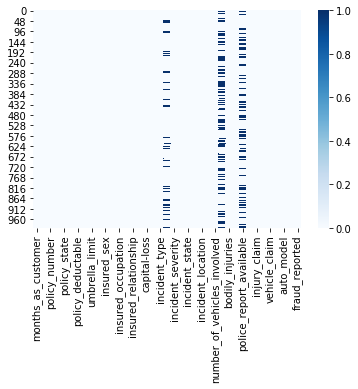

In [9]:
# let's plot heatmap to visualize null values

sns.heatmap(fraud.isnull(),cmap='Blues')

In [10]:
# let's check how many unique values presents in the each columns in the dataset


col= fraud.columns.values
col

list((columns,np.unique(fraud[columns].astype(str)).size) for columns in col)


[('months_as_customer', 391),
 ('age', 46),
 ('policy_number', 1000),
 ('policy_bind_date', 951),
 ('policy_state', 3),
 ('policy_csl', 3),
 ('policy_deductable', 3),
 ('policy_annual_premium', 991),
 ('umbrella_limit', 11),
 ('insured_zip', 995),
 ('insured_sex', 2),
 ('insured_education_level', 7),
 ('insured_occupation', 14),
 ('insured_hobbies', 20),
 ('insured_relationship', 6),
 ('capital-gains', 338),
 ('capital-loss', 354),
 ('incident_date', 60),
 ('incident_type', 4),
 ('collision_type', 4),
 ('incident_severity', 4),
 ('authorities_contacted', 5),
 ('incident_state', 7),
 ('incident_city', 7),
 ('incident_location', 1000),
 ('incident_hour_of_the_day', 24),
 ('number_of_vehicles_involved', 4),
 ('property_damage', 3),
 ('bodily_injuries', 3),
 ('witnesses', 4),
 ('police_report_available', 3),
 ('total_claim_amount', 763),
 ('injury_claim', 638),
 ('property_claim', 626),
 ('vehicle_claim', 726),
 ('auto_make', 14),
 ('auto_model', 39),
 ('auto_year', 21),
 ('fraud_reported'

In [11]:
# now we check how many count of class are available in to fraud _reports feture in fraud dataset

fraud['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [12]:
# univariate analysis of Numerical  variables using a describe() function
# describe function provide  statistics summary of continuous variable.

fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Key Observation :-

- The automobile insurance claim Fraud dataset has 1000 rows with 39 features.

- we checked above in the customer feature has total 9134 unique id of customers that means no customer repeat so it will not     help in claim amount prediction.

- We observed that some categorical columns have 900+ unique values. We will remove these columns from our dataset because       these columns not help in model accuracy. below present those columns.

1. policy number (1000)
2. policy bind date (951)
3. insured zip (995)
4. insured location (1000)
5. incident date (60)

- the heatmap and data information confirms , their is missing values presence in collision_type,property_damage and             police_report_available columns in the datasets.

- in which "fraud_reported" is our Target varible.


# statistic summary observations :-

- the mean is more than median(50th percentile) in all columns except age and capital loss columns.

- there is a large difference in 75th -- - percentile and max in the Total Claim Amount,property_claim, capital-gain,             policy_number and months_as_customer columns in the dataset.

- the 1 and 2 observation suggest that there is outlier present in these five columns.

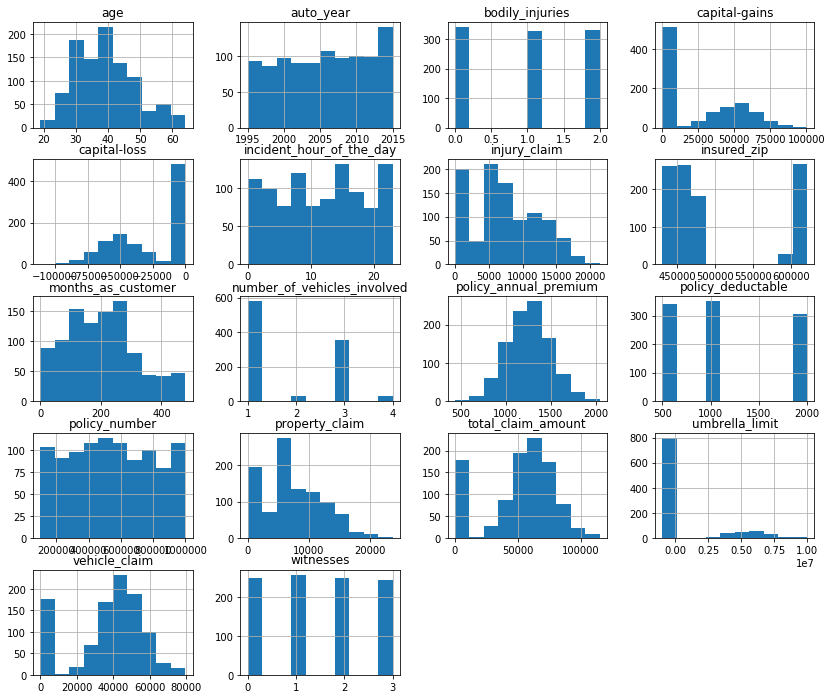

In [13]:
# Let's do some plotting to know how the data columns are distributed in the  dataset
# univariate data analysis by graphical representation.
# let's plot histogram for numerical varibles to check all feature in the dataset whether normal distribution or not.

fraud.hist(figsize=(14,12))
plt.show()

# the histogram show all columns in form of normal distribution except umbrella limit in the dataset

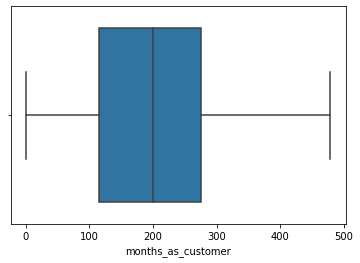

In [14]:
# let's plot Box Plot for understanding the distribution and observe the presence of outliers.

sns.boxplot(x='months_as_customer',data=fraud)

# no outliers presence in this column

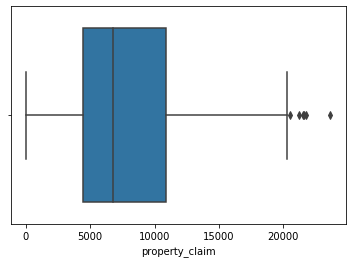

In [15]:
# below boxplot shows presence of outliers 

sns.boxplot(x='property_claim',data=fraud)

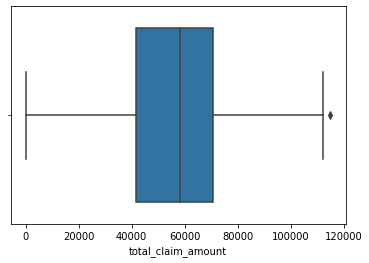

In [16]:
# below boxplot show ouliers presence in total claim amount column

sns.boxplot(x='total_claim_amount',data=fraud)

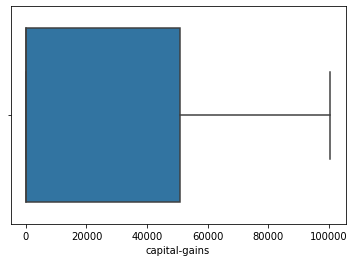

In [17]:
# the below boxplot show huge gap between 75% and max values in the capital- gains column, most of the value distributed 0 to 50000
sns.boxplot(x='capital-gains',data=fraud)

In [18]:
# # lets check the skewness of the dataset using skew function
fraud.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

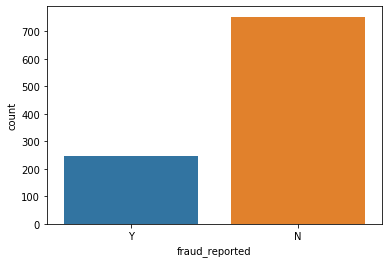

In [19]:
#lets plot the countplot of 'fraud reported'  feature to understand distribution of the data.

sns.countplot(x="fraud_reported",data=fraud)
plt.show()

# from the below graph we say that it is imblance dataset because out of 1000 auto insurance claim only 250 insurance claims are fraud

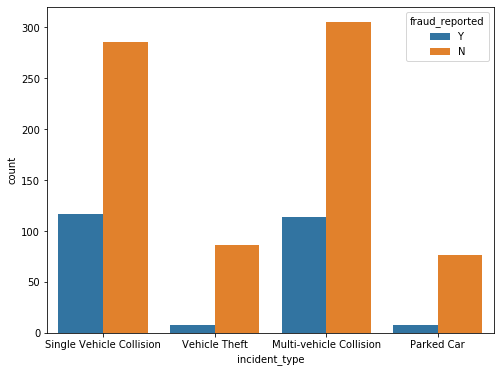

In [20]:
#lets check the count of "Fraud_reported" considering with "incident_type"
plt.figure(figsize=(8,6))

sns.countplot(x="incident_type",hue="fraud_reported",data=fraud)
plt.show()


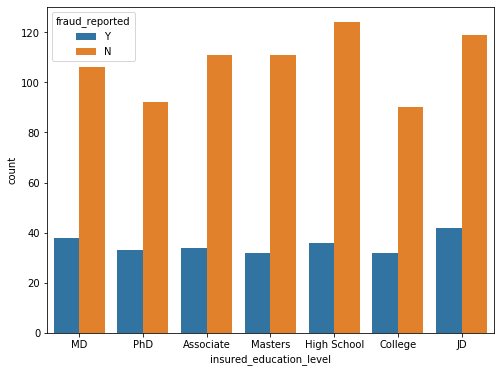

In [21]:
#lets check the count of "Fraud_reported" considering with "insured_education_level"

plt.figure(figsize=(8,6))

sns.countplot(x="insured_education_level",hue="fraud_reported",data=fraud)
plt.show()

# accordind to below graph we can say that auto claim fraud reported high where insured education is "Jd"

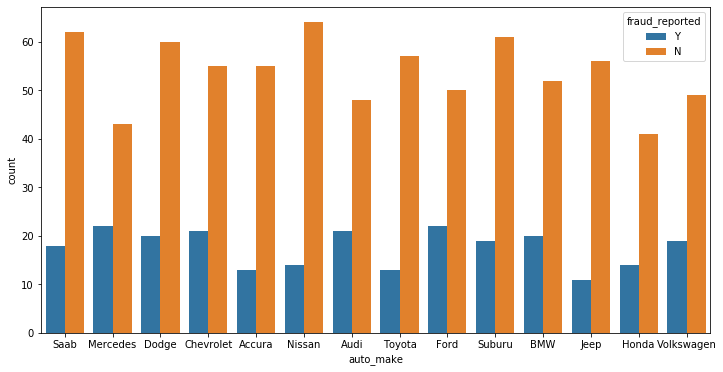

In [22]:
#lets check the count of "Fraud_reported" considering with "auto_make"

plt.figure(figsize=(12,6))

sns.countplot(x="auto_make",hue="fraud_reported",data=fraud)
plt.show()


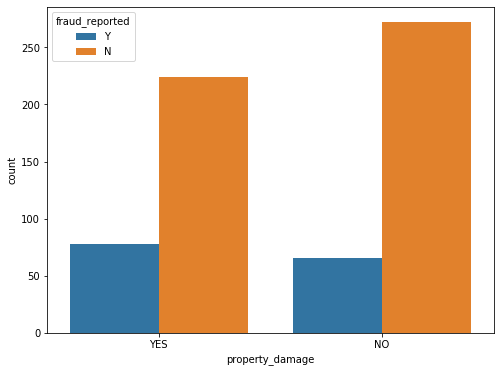

In [23]:
#lets check the count of "Fraud_reported" considering with "property_damage"

plt.figure(figsize=(8,6))

sns.countplot(x="property_damage",hue="fraud_reported",data=fraud)
plt.show()

In [24]:
# let's fill missing values first using mean,median and mode method 

# now we fill missing values with   most frequent values in Property _damage,collision_type and police_report_available feature 
# using SimpleImputer method

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
fraud['property_damage']=imp.fit_transform(fraud['property_damage'].values.reshape(-1,1))
fraud['collision_type']=imp.fit_transform(fraud['collision_type'].values.reshape(-1,1))
fraud['police_report_available']=imp.fit_transform(fraud['police_report_available'].values.reshape(-1,1))

In [25]:
# let's check null values again
fraud.isnull().sum()
# no null values presents in the dataset

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [26]:
# We will first remove the columns that we have discussed above because that have many unique values.

fraud.drop(["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date"],axis=1,inplace=True)


In [27]:
# let's check shape of the dataset again

fraud.shape

# we have total 34 columns after drop columns which mentioned above.

(1000, 34)

In [28]:
# first let's convert "fraud_reported" target variable to check relationship with numerical columns.
label = LabelEncoder()
fraud["fraud_reported"] = label.fit_transform(fraud["fraud_reported"].astype('str'))

In [29]:
# get correlation of each feature in the dataset
data= fraud.corr()
data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,0.051839
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527,0.033877


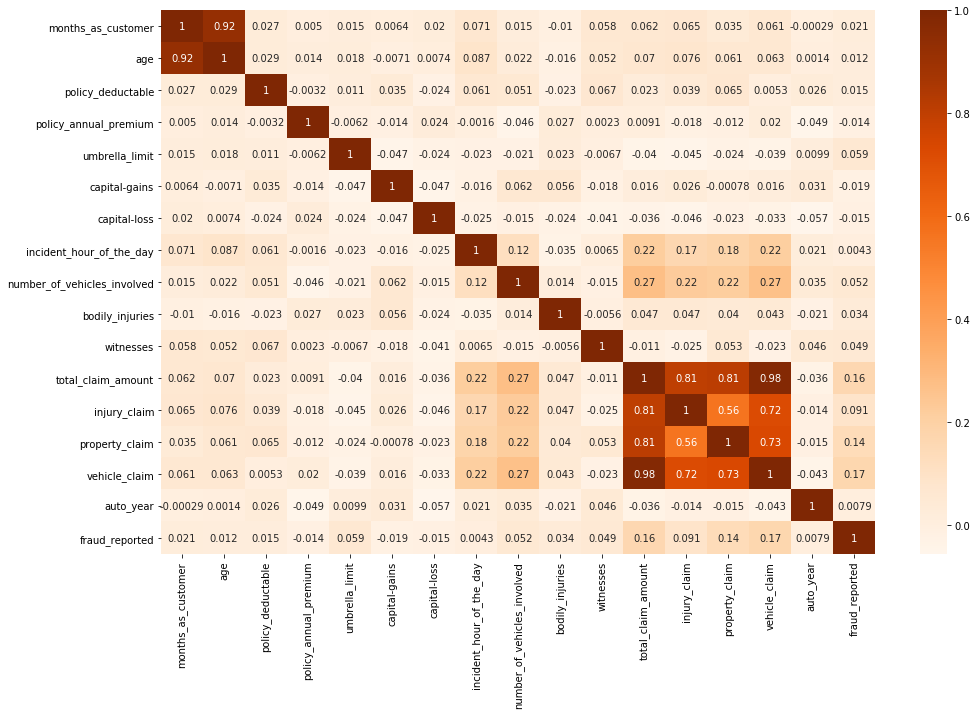

In [30]:
# get correlation of each feature in the dataset
# visualize correlation matrix using heatmap

plt.figure(figsize=(16,10))
sns.heatmap(data,cmap='Oranges',annot=True) 

# observation :-

- dark shades are highly correlated with each other.

- the total_claim_amount,injury_claim,property_claim and vehicle_claim columns is highly positive correlated with each others     and also positively correlated with fraud_reported feature.

- month_as_customer and age feture highly correlated with each others.


In [31]:
# Separate categorical and numberical columns

cat_col = fraud.dtypes[fraud.dtypes == 'object']
num_col = fraud.dtypes[fraud.dtypes != 'object']

In [32]:
cat_col

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
dtype: object

In [33]:
# let's convert all our categorical varibles into numeric by encoding the categories
# we using labelEncoder for that

label = LabelEncoder()
for col in fraud:
     if fraud[col].dtype == 'object':
        fraud[col] = label.fit_transform(fraud[col].astype('str'))

In [34]:
fraud.head(3)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0


In [35]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [36]:
# lets remove outliers from loan dataset
# let's check and remove outliers in the dataset using z_score method
from scipy.stats import zscore

z_score=abs(zscore(fraud))
print(fraud.shape)
fraud=fraud.loc[(z_score<3).all(axis=1)]
print(fraud.shape)

# we can see that 980 rows and 34 columns presents in dataset

(1000, 34)
(980, 34)


In [37]:
# let's seperate the dataset as input variable and output variabes

x = fraud.drop('fraud_reported', axis = 1)
y = fraud['fraud_reported']

In [38]:
# let's check shape x and y
print(x.shape)
print(y.shape)

(980, 33)
(980,)


In [39]:
# Applying Standard scaling to get optimized result

#Lets bring features to common scale

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)


In [40]:
x

array([[ 1.06956809,  0.98335151,  1.17982066, ...,  0.85195935,
        -1.64044692, -0.18859446],
       [ 0.20272605,  0.32971067, -0.0245796 , ...,  0.35527871,
        -0.65173967,  0.31047639],
       [-0.61210547, -1.08651116,  1.17982066, ..., -0.63808258,
         0.96614491,  0.31047639],
       ...,
       [-0.64677915, -0.54181045,  1.17982066, ...,  1.10029967,
        -0.02256234, -1.51945005],
       [ 2.19646275,  2.50851348, -1.22897986, ..., -1.38310355,
        -1.28091701, -1.18673615],
       [ 2.17912591,  2.2906332 ,  1.17982066, ...,  0.35527871,
        -0.65173967,  0.31047639]])

In [41]:
# Train and Test splitting of data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [42]:
print(x_train.shape)
print(y_train.shape)

(764, 33)
(764,)


In [43]:
print(x_test.shape)
print(y_test.shape)

(216, 33)
(216,)


# Our training and testing data is ready now to perform machine learning algorithm¶

##  the Auto insurance claim fraud prediction is a classification problem, so we can use                 Multiple  classification algorithm with hyperparameter tune.

- first we use Logistic regression model because the target variable hold binary classification (0 and 1) to check accuracy        score level.

- we also used different classification model to check and compare whether we get high accuracy score or not, this exercise       help us to select best model.

- We will use the following algorithms
- Logistic Regression
- DecisionTrees
- Random Forests
- SVM
- naviebyes

In [44]:
# let's use PCA techniques to select best dimention in the dataset

from sklearn.decomposition import PCA 
pca = PCA(n_components=30) 
  
x = pca.fit_transform(x) 


In [45]:
x.shape

(980, 30)

In [46]:
# let's make function to run multiple algorithm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def max_accuracyscore(mod,x,y):
    max_accuracy_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = r_state)  
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        a_score=accuracy_score(y_test,y_pred)
        if a_score>max_accuracy_score:
            max_accuracy_score=a_score
            final_r_state=r_state
    print("max Accuracy_Score corresponding to ",final_r_state," is ",max_accuracy_score)
    return final_r_state

In [47]:
#Lets use logistic regression and check
#from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
max_accuracyscore(lg,x,y)

max Accuracy_Score corresponding to  63  is  0.8240740740740741


63

In [48]:
# Lets use cross validation metod to get cross val score because target varible is imbalanced

from sklearn.model_selection import cross_val_score

print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,x,y,cv=5,scoring="accuracy"))

Mean accuracy score for Logistic Regression:  0.7744897959183673
standard deviation in accuracy score for Logistic Regression:  0.024869505320314136


cross val accuracy score: [0.77040816 0.77040816 0.73469388 0.81122449 0.78571429]


In [49]:
#Lets use SVM with hyparameter tune GridsearchCv 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gv = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
gv.fit(x,y)
gv.best_params_

{'C': 1, 'kernel': 'linear'}

In [50]:
svc=SVC(kernel="linear",C=1)
max_accuracyscore(svc,x,y)

max Accuracy_Score corresponding to  59  is  0.8333333333333334


59

In [51]:
# lets check cross val score and mean accuracy of cross val score

print("Mean accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,x,y,cv=5,scoring="accuracy"))


Mean accuracy score for SVC:  0.7765306122448979
standard deviation in accuracy score for SVC:  0.026095330311315154


cross val accuracy score: [0.75510204 0.79081633 0.76020408 0.82142857 0.75510204]


In [52]:
# let's apply decision tree model

dc = DecisionTreeClassifier()
max_accuracyscore(dc,x,y)

max Accuracy_Score corresponding to  54  is  0.7268518518518519


54

In [53]:
#lets use random forest classifier model to increase accuracy

parameters={"n_estimators":[10,100,500]}
rf=RandomForestClassifier()
Gcv = GridSearchCV(rf, parameters, cv=5,scoring="accuracy")
Gcv.fit(x,y)
Gcv.best_params_

{'n_estimators': 100}

In [54]:
rf=RandomForestClassifier(n_estimators=500)
max_accuracyscore(rf,x,y)

max Accuracy_Score corresponding to  68  is  0.8148148148148148


68

In [55]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for RandomForest: ",cross_val_score(rf,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for RandomForest: ",cross_val_score(rf,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val RandomForest:',cross_val_score(rf,x,y,cv=5,scoring="accuracy"))

Mean accuracy score for RandomForest:  0.763265306122449
standard deviation in accuracy score for RandomForest:  0.006920744880740087


cross val RandomForest: [0.77040816 0.76530612 0.75510204 0.76530612 0.75510204]


In [57]:
# let's use Bernoulli Naive Bayes model

from sklearn.naive_bayes import GaussianNB

Gan = GaussianNB()
max_accuracyscore(Gan,x,y)

max Accuracy_Score corresponding to  63  is  0.8240740740740741


63

In [60]:
print("Mean accuracy score for GaussianNB: ",cross_val_score(Gan,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for GaussianNB: ",cross_val_score(Gan,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(Gan,x,y,cv=5,scoring="accuracy"))


Mean accuracy score for GaussianNB:  0.7612244897959184
standard deviation in accuracy score for GaussianNB:  0.025489787748564873


cross val accuracy score: [0.73469388 0.75       0.73979592 0.78061224 0.80102041]


# I used multiple algorithms to get highest accuracy score corresponding to random state hyperameter tune and gridsearchcv tune.

we seen till now SVC is best model as comparision to other model which are apply in this because we got max accuracy score is 83% at random state 59 and also get high cross val accuracy score 77%

So we save model SVC for production.

In [61]:
# let's create final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =59,test_size=0.22)
svc=SVC(kernel="linear",C=1,probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
a_score=accuracy_score(y_test,y_pred)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

# lets check cross val score and mean accuracy of cross val score

print("Mean accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,x,y,cv=5,scoring="accuracy"))


Confusion matrix 
 [[144  22]
 [ 14  36]]
classification report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       166
           1       0.62      0.72      0.67        50

    accuracy                           0.83       216
   macro avg       0.77      0.79      0.78       216
weighted avg       0.84      0.83      0.84       216

Mean accuracy score for SVC:  0.7765306122448979
standard deviation in accuracy score for SVC:  0.026095330311315154


cross val accuracy score: [0.75510204 0.79081633 0.76020408 0.82142857 0.75510204]


In [62]:
# let's draw roc_auc_curve for Logistic regression model because it is our final model 

from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob=svc.predict_proba(x_test)[:,1]

#predict_proba function will take test data and try to predict internaly the higher level of queue of given test data

In [63]:
pr,tpr,treshold = roc_curve(y_test,y_pred_prob) # text actual with predicted probality y

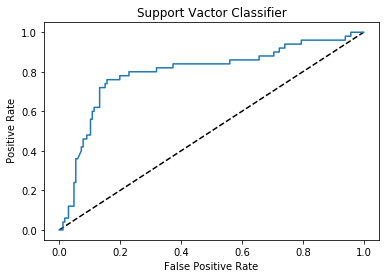

In [64]:
y_pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel(' Positive Rate')
plt.title('Support Vactor Classifier')
plt.show()

In [65]:
# let's check roc_auc _score 

auc_score= roc_auc_score(y_test,svc.predict(x_test))
auc_score

0.7937349397590361

In [67]:
from sklearn.externals import joblib
# save the model as a pickle in a file
joblib.dump(svc,'Auto_Claim_Fraud.pkl')

['Auto_Claim_Fraud.pkl']